In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-predictions/st.ipynb
/kaggle/input/student-performance-predictions/student_performance.csv
/kaggle/input/student-performance-predictions/best_student_performance_model.pkl


In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('/kaggle/input/student-performance-predictions/student_performance.csv')
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


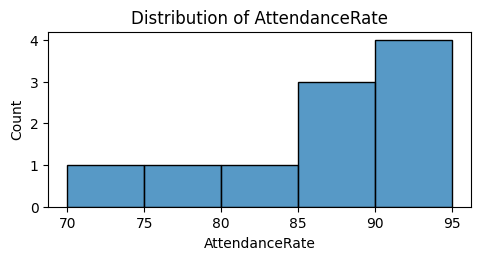

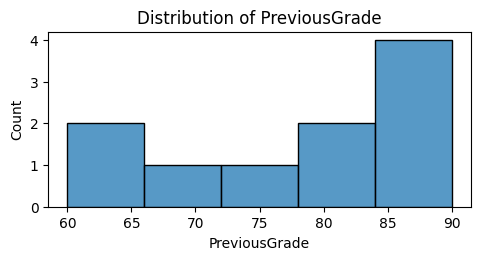

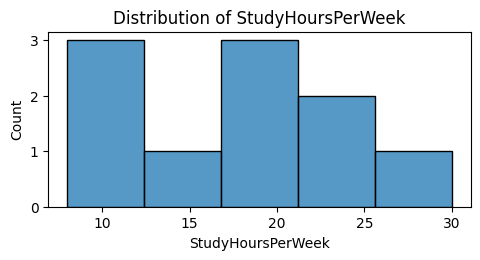

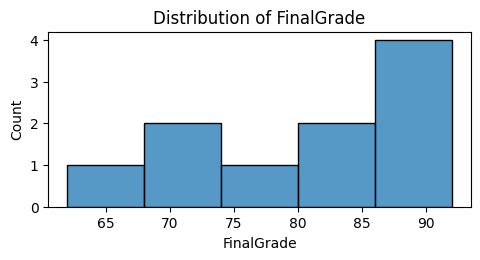

In [79]:
a = ['AttendanceRate','PreviousGrade','StudyHoursPerWeek','FinalGrade']
for i,x in enumerate (a):
    plt.figure(figsize=(12,5))
    plt.subplot(2,2,i+1)
    sns.histplot(data = df, x = x)
    plt.title(f"Distribution of {x}");

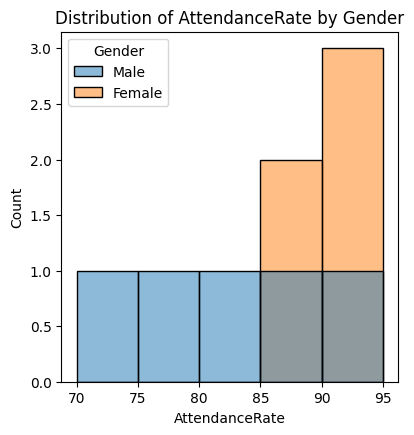

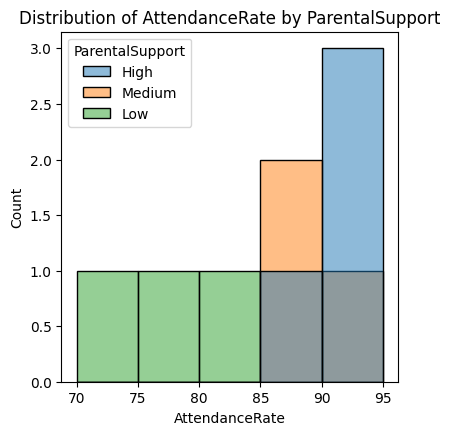

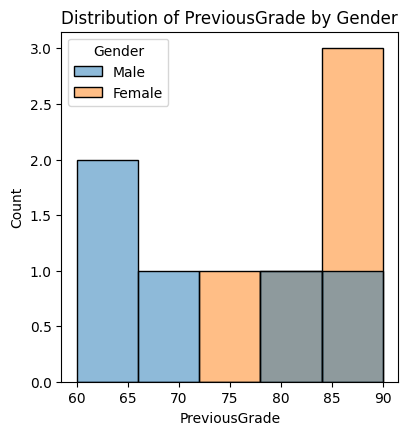

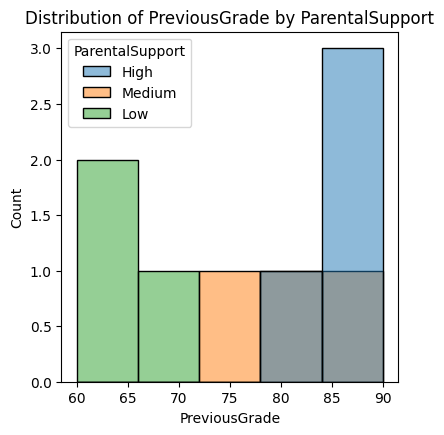

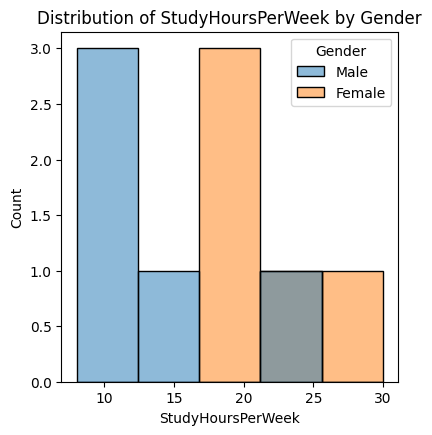

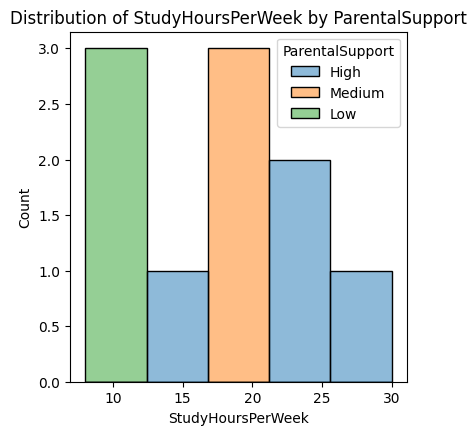

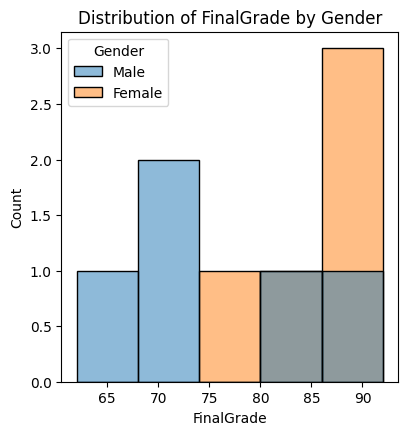

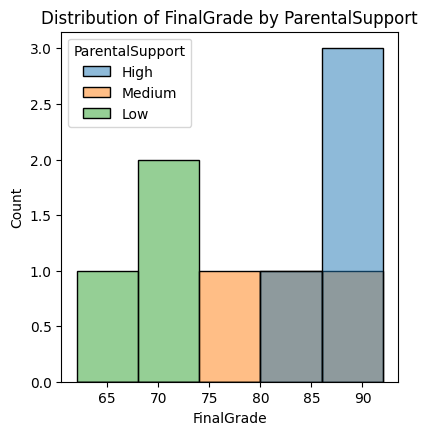

In [80]:
a = ['AttendanceRate','PreviousGrade','StudyHoursPerWeek','FinalGrade']
b = ['Gender','ParentalSupport']
for i,x in enumerate (a):
    for y in b:
        plt.figure(figsize=(20,10))
        plt.subplot(2,4,i+1)
        sns.histplot(data = df, x = x, hue = y)
        plt.title(f"Distribution of {x} by {y}");

In [81]:
# Feature selection
df_model = df.iloc[:,2:]
df_model['Gender'] = df_model['Gender'].replace({'Male':0,"Female":1})
df_model['ParentalSupport'] = df_model['ParentalSupport'].replace({'Low':1,
                                                                   "Medium":2,
                                                                   "High":3})
df_model

,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,0,85,15,78,1,3,80
1,1,90,20,85,2,2,87
2,0,78,10,65,0,1,68
3,0,92,25,90,3,3,92
4,1,88,18,82,2,2,85
5,1,95,30,88,1,3,90
6,0,70,8,60,0,1,62
7,1,85,17,77,1,2,78
8,0,82,12,70,2,1,72
9,1,91,22,86,3,3,88


In [1]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X = df_model.drop(columns=['FinalGrade'])
y = df_model['FinalGrade'].to_numpy().reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
X_train = x_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)
model = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
models = ['Linear Regression','Decision Tree','Random Forest']
for i, x in enumerate(model):
    train = x.fit(X_train,y_train)
    train_test = x.predict(X_test)
    print("Model for", models[i])
    print("MAE: ",np.round(mean_absolute_error(y_test, train_test),5),"%")
    print("MAE: ",np.round(mean_squared_error(y_test, train_test),5),"%")
    print("MAE: ",np.round(np.sqrt(mean_absolute_error(y_test, train_test)),5),"%")
    print("MAE: ",np.round(r2_score(y_test, train_test),5),"%")

NameError: name 'MinMaxScaler' is not defined

In [83]:
#Linear model is the best model
# Predict
best_model = LinearRegression()
best_model.fit(X_train,y_train)

LinearRegression()

In [84]:
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


Input :
1. Gender (0 for male and 1 for Female)
2. Attendance Rate
3. StudyHoursPerWeek
4. PreviousGrade
5. ExtracurricularActivities
6. ParentalSupport

output: Final Grade


In [85]:
#example_test
z = np.array([[1,91,22,86,3,3]])
input_model = x_scaler.transform(z)
print("Final Grade Prediciton: ",np.round(y_scaler.inverse_transform(best_model.predict(input_model)),2)[0][0])

Final Grade Prediciton:  87.98


In [86]:
# simulation for model
gender = int(input("Gender: "))
Attendance_rate = int(input('Attendance Rate: '))
StudyHoursPerWeek = int(input("Study Hours Per Week: "))
Previousgrade = int(input("Previous Grade: "))
ExtracurricularActivities = int(input("Extracurricular Activities: "))
Parentalsupport = int(input("Parental Support: "))
z = np.array([[gender,Attendance_rate,StudyHoursPerWeek,Previousgrade,ExtracurricularActivities ,Parentalsupport]])
input_model = x_scaler.transform(z)
prediction = np.round(y_scaler.inverse_transform(best_model.predict(input_model)),2)
print("Final Grade Prediciton: ",min,(prediction,100)[0][0])

Gender:  1
Attendance Rate:  90
Study Hours Per Week:  30
Previous Grade:  98
Extracurricular Activities:  3
Parental Support:  3


Final Grade Prediciton:  97.97
